In [1]:
from codecs import mbcs_decode
from ctypes.wintypes import WORD
from pickle import TUPLE
from platform import python_branch
import gym
from gym import Env
import numpy as np
import pygame
from gym import spaces
from tensorflow import keras
from keras import layers
from keras.optimizers import Adam
from keras import Sequential
from keras import callbacks
from keras.callbacks import History
from rl.agents import DQNAgent
from rl.memory import SequentialMemory
from rl.policy import BoltzmannQPolicy
import matplotlib.pyplot as plt
import math


pygame 2.1.2 (SDL 2.0.18, Python 3.10.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class Game(Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 3}

    def __init__(self, render_mode=None, size=11):
        self.size = size  # The size of the square grid
        self.window_size = 512  # The size of the PyGame window
        self.human = 'human'
        self.rgb = 'rgb_array'
        
        self.observation_space = spaces.Box(np.array([0,0]), np.array([size-1,size-1]), shape=(2,),dtype=int)
        print(self.observation_space)
        
        #Moveset of the Agent (Left, Right, Up, Down, Stay)
        self.action_space = spaces.Discrete(4)
        self._action_to_direction = {
            0: np.array([1, 0],dtype=int),
            1: np.array([0, 1],dtype=int),
            2: np.array([-1, 0],dtype=int),
            3: np.array([0, -1],dtype=int),
        }
        self.action_space_enemy = spaces.Discrete(2)
        self._action_to_direction_enemy = {
            0: np.array([0, 0],dtype=int),
            1: np.array([0, 0],dtype=int),
        }

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        """
        If human-rendering is used, `self.window` will be a reference
        to the window that we draw to. `self.clock` will be a clock that is used
        to ensure that the environment is rendered at the correct framerate in
        human-mode. They will remain `None` until human-mode is used for the
        first time.
        """
        self.window = None
        self.clock = None
        
        self._obstacle_location1 = np.array([2,2])
        self._obstacle_location2 = np.array([2,3])
        self._obstacle_location3 = np.array([2,4])
        self._obstacle_location4 = np.array([3,2])
        self._obstacle_location5 = np.array([4,2])
        self._obstacle_location6 = np.array([6,8])
        self._obstacle_location7 = np.array([7,8])
        self._obstacle_location8 = np.array([8,6])
        self._obstacle_location9 = np.array([8,7])
        self._obstacle_location10 = np.array([8,8])

        self.obstacles = np.array([self._obstacle_location1,
                            self._obstacle_location2,
                            self._obstacle_location3,
                            self._obstacle_location4,
                            self._obstacle_location5,
                            self._obstacle_location6,
                            self._obstacle_location7,
                            self._obstacle_location8,
                            self._obstacle_location9,
                            self._obstacle_location10])


    def _get_Agent(self):

        target = int(math.dist([0,0],self._target_location))
        agent = int(math.dist([0,0],self._agent_location))
        dist = target-agent
        targetenemy = int(math.dist([0,0],self._agent_location))
        enemy = int(math.dist([0,0],self.enemy_location))
        dist = int(math.dist(self._target_location,self._agent_location))
        disttoenemy = int(math.dist(self.enemy_location,self._agent_location))
        distbundle = np.array([dist,disttoenemy],dtype=int)
        distbundle1 = np.array([agent,target],dtype=int)
        distance = self._target_location - self._agent_location 
        return agentloc
    def _get_Target(self):
        return self._target_location



    def reset(self, options=None):
        # We need the following line to seed self.np_random
        self.steps = 0
        self.reward = 0
        # Choose the agent's location uniformly at random
        self._agent_location= np.random.randint(
                 self.size-1, self.size-0, size=2
            ) 
        self.enemy_location = np.array([0,0])
        
        #print(self.obstacles)
        self.row1 = True
        self.row2 = False
        self.row3 = False
        self.row4 = False
        self.row5 = False
        self.row6 = False
        self.row7 = False
        self.row8 = False
        self.row9 = False

        self._target_location = np.array([5,5])

        if self.render_mode == self.human:
            self._render_frame()
        
        self.observation = self._get_Agent()
        
        self.info = {}
        return self.observation

    def step(self, action):
        actionenemy = self.action_space_enemy.sample()
        self.reward_gain = 1
        self.reward_loss = 0.001
        self.steps += 1
        direction = self._action_to_direction[action]
        directionenemy = self._action_to_direction_enemy[actionenemy]
        newenemydirection = self.enemy_location + directionenemy
        newdirection = self._agent_location + direction

        if(newdirection == self.obstacles).all(axis=1).any():
            self._agent_location = self._agent_location
        else:
            self._agent_location = np.clip(
            self._agent_location + direction, 0, self.size - 1, 
            )
    
        if(newenemydirection == self.obstacles).all(axis=1).any():
            self.enemy_location = self.enemy_location -directionenemy

        self.enemy_location = np.clip(
            self.enemy_location + directionenemy, 0, self.size - 1, 
        )

        
        if(self.row1 == True and np.array_equal([10,9], self._agent_location)):
            self.row1 = False
            self.row2 = True
            self.reward += 0.5
        if(self.row2 == True and np.array_equal([10,8], self._agent_location)):
            self.row2 = False
            self.row3 = True
            self.reward += 0.5
        if(self.row3 == True and np.array_equal([10,7], self._agent_location)):
            self.row3 = False
            self.row4 = True
            self.reward += 0.5
        if(self.row4 == True and np.array_equal([10,6], self._agent_location)):
            self.row4 = False
            self.row5 = True
            self.reward += 0.5
        if(self.row5 == True and np.array_equal([10,5], self._agent_location)):
            self.row5 = False
            self.row6 = True
            self.reward += 0.5
        if(self.row6 == True and np.array_equal([10,4], self._agent_location)):
            self.row6 = False
            self.row7 = True
            self.reward += 0.5
        if(self.row7 == True and np.array_equal([9,4], self._agent_location)):
            self.row7 = False
            self.row8 = True
            self.reward += 0.5
        if(self.row8 == True and np.array_equal([8,4], self._agent_location)):
            self.row8 = False
            self.row9 = True
            self.reward += 0.5
        if(self.row9 == True and np.array_equal([7,4], self._agent_location)):
            self.row9 = False
            self.reward += 0.5

        self.terminated = np.array_equal(self._agent_location, self._target_location)
        self.reward += self.reward_gain if self.terminated else - self.reward_loss  

        if self.render_mode == self.human:
            self._render_frame()
        self.observation = self._get_Agent()
        self.info = {}
        return (self.observation, self.reward,self.terminated, self.info)

    def render(self):
        if self.render_mode == self.rgb:
            return self._render_frame()

    def _render_frame(self):
        if self.window is None and self.render_mode == self.human:
            pygame.init()
            pygame.display.init()
            self.window = pygame.display.set_mode((self.window_size, self.window_size))
        if self.clock is None and self.render_mode == self.human:
            self.clock = pygame.time.Clock()

        canvas = pygame.Surface((self.window_size, self.window_size))
        canvas.fill((255, 255, 255))
        pix_square_size = (
            self.window_size / self.size
        )  # The size of a single grid square in pixels

        # First we draw the target
        pygame.draw.rect(
            canvas,
            (255, 0, 0),
            pygame.Rect(
                pix_square_size * self._target_location,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location1,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location2,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location3,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location4,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location5,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location6,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location7,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location8,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location9,
                (pix_square_size, pix_square_size),
            ),
        )
        pygame.draw.rect(
            canvas,
            (0, 0, 0),
            pygame.Rect(
                pix_square_size * self._obstacle_location10,
                (pix_square_size, pix_square_size),
            ),
        )
        # Now we draw the agent
        pygame.draw.circle(
            canvas,
            (0, 0, 255),
            (self._agent_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )
        pygame.draw.circle(
            canvas,
            (0, 255, 0),
            (self.enemy_location + 0.5) * pix_square_size,
            pix_square_size / 3,
        )
        
        
       
        # Finally, add some gridlines
        for x in range(self.size + 1):
            pygame.draw.line(
                canvas,
                0,
                (0, pix_square_size * x),
                (self.window_size, pix_square_size * x),
                width=2,
            )
            pygame.draw.line(
                canvas,
                0,
                (pix_square_size * x, 0),
                (pix_square_size * x, self.window_size),
                width=2,
            )

        if self.render_mode == self.human:
            # The following line copies our drawings from `canvas` to the visible window
            self.window.blit(canvas, canvas.get_rect())
            pygame.event.pump()
            pygame.display.update()

            # We need to ensure that human-rendering occurs at the predefined framerate.
            # The following line will automatically add a delay to keep the framerate stable.
            self.clock.tick(self.metadata["render_fps"])
        else:  # rgb_array
            return np.transpose(
                np.array(pygame.surfarray.pixels3d(canvas)), axes=(1, 0, 2)
            )

    def close(self):
        if self.window is not None:
            pygame.display.quit()
            pygame.quit()


In [3]:
env = Game()


Box([0 0], [10 10], (2,), int32)


In [4]:
env.observation_space.sample()

array([4, 2])

In [5]:
human = 'human'
rgb = 'rgb_array'
env = Game(render_mode=rgb)

Box([0 0], [10 10], (2,), int32)


In [6]:
env.reset()
episodes = 20
score = 0

for episode in range(1, episodes+1):
    steps = 0
    done = False
    observation = env.reset()
    score = 0 
    while not done:
        action = env.action_space.sample()
        observation, reward, terminated, info = env.step(action)
        env.render()
        steps +=1
        if(np.array_equal(env._agent_location, env._target_location)):
            score += env.reward
            done = True
        elif(np.array_equal(env._agent_location, env.enemy_location)):
            score += env.reward
            reward +=1
            done = True
 
    print('Episode:{} Score:{}'.format(episode,score), "steps:{} ".format(steps))
env.close()

Episode:1 Score:1.4289999999999998 steps:72 
Episode:2 Score:4.162000000000036 steps:339 
Episode:3 Score:2.7170000000000276 steps:284 
Episode:4 Score:1.916 steps:85 
Episode:5 Score:1.2929999999999997 steps:208 
Episode:6 Score:3.3530000000000113 steps:148 
Episode:7 Score:4.366000000000007 steps:135 
Episode:8 Score:4.430000000000007 steps:71 
Episode:9 Score:4.633000000000079 steps:868 
Episode:10 Score:4.872000000000011 steps:129 
Episode:11 Score:3.4580000000000033 steps:43 
Episode:12 Score:0.042999999999999594 steps:457 
Episode:13 Score:5.2739999999999805 steps:227 
Episode:14 Score:2.248000000000024 steps:253 
Episode:15 Score:1.894 steps:107 
Episode:16 Score:4.302000000000021 steps:199 
Episode:17 Score:4.34100000000001 steps:160 
Episode:18 Score:5.315999999999973 steps:185 
Episode:19 Score:0.5059999999999996 steps:495 
Episode:20 Score:4.272999999999986 steps:227 


In [7]:
states = env.observation_space.shape
actions = env.action_space.n

In [8]:
print(actions)
print(states)

4
(2,)


In [9]:
def build_model(states, actions):
    model = Sequential()  
    model.add(layers.Dense(24, activation='relu', input_shape=(1,2)))
    model.add(layers.Flatten()) 
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(actions, activation='linear'))
    
    return model

In [10]:
#del model 

In [11]:
model = build_model(states, actions)
print(model.output_shape)

(None, 4)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1, 24)             72        
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 24)                600       
                                                                 
 dense_2 (Dense)             (None, 4)                 100       
                                                                 
Total params: 772
Trainable params: 772
Non-trainable params: 0
_________________________________________________________________


In [13]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=100000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=(actions), nb_steps_warmup=100, target_model_update=1e-2)
    return dqn

In [14]:
dqn = build_agent(model, actions)
dqn.compile(Adam(learning_rate=10e-3), metrics=['mae'])
history = dqn.fit(env, nb_steps=100000, visualize=False, verbose=1)
print(history.history.keys())


Training for 100000 steps ...
Interval 1 (0 steps performed)
   82/10000 [..............................] - ETA: 12s - reward: 0.2390     

C:\Users\Sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 50s 5ms/step - reward: -0.5740
Interval 2 (10000 steps performed)
10000/10000 [==============================] - 50s 5ms/step - reward: -0.6131
1 episodes - episode_reward: -10270.834 [-10270.834, -10270.834] - loss: 5.111 - mae: 67.441 - mean_q: 90.662

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 54s 5ms/step - reward: -4.9150
6 episodes - episode_reward: -8781.845 [-56357.119, 1422.665] - loss: 7.250 - mae: 30.466 - mean_q: 16.783

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 56s 6ms/step - reward: -1.6085
Interval 5 (40000 steps performed)
10000/10000 [==============================] - 55s 5ms/step - reward: -1.6361
2 episodes - episode_reward: -15206.401 [-33070.174, 2657.371] - loss: 8.657 - mae: 37.978 - mean_q: -48.309

Interval 6 (50000 steps performed)
10000/10000 [==============================] - 56s 6ms/step - reward: -3.6201
13 episodes - episode_reward

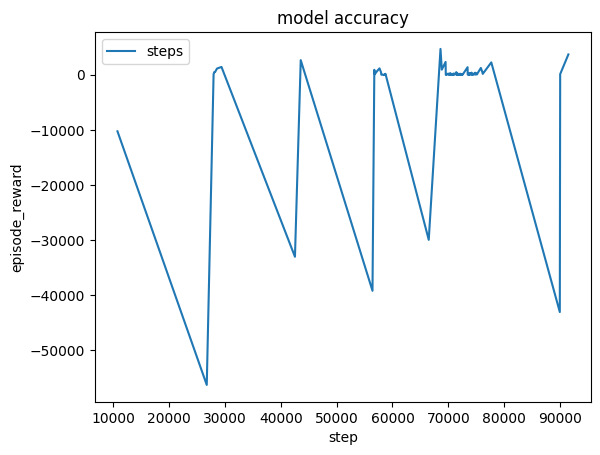

In [15]:

plt.plot(history.history['nb_steps'],history.history['episode_reward'])
#plt.plot(history.history['nb_episode_steps'])
plt.title('model accuracy')
plt.ylabel('episode_reward')
plt.xlabel('step')
plt.legend(['steps', 'steps'], loc='upper left')
plt.show()


In [16]:
scores = dqn.test(env, nb_episodes=10, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 10 episodes ...


KeyboardInterrupt: 

In [ ]:
env = Game(render_mode=human)
env.reset()
episodes = 10
score = 0

for episode in range(1, episodes+1):
    steps = 0
    done = False
    env.reset()
    score = 0 
    while not done:
        #action = env.action_space.sample()
        action = dqn.forward(observation)
        
        #actionenemy = env.action_space_enemy.sample()
        observation, reward, terminated, info = env.step(action)
        #print(reward)
        env.render()
        steps +=1
        if(np.array_equal(env._agent_location, env._target_location)):
            score += env.reward
            done = True
        elif(np.array_equal(env._agent_location, env.enemy_location)):
            score += env.reward
            done = True
            
    print('Episode:{} Score:{}'.format(episode,score), "steps:{} ".format(steps))
env.close()

Box([0 0], [10 10], (2,), int32)
Episode:1 Score:0.991 steps:10 
Episode:2 Score:0.991 steps:10 
Episode:3 Score:0.991 steps:10 
Episode:4 Score:0.991 steps:10 
Episode:5 Score:0.991 steps:10 
Episode:6 Score:0.991 steps:10 
Episode:7 Score:0.991 steps:10 
Episode:8 Score:0.991 steps:10 
Episode:9 Score:0.991 steps:10 
Episode:10 Score:0.991 steps:10 
